In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Model
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
# Metrics
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
X= df[['weathersit', 'temp', 'hum', 'windspeed']]
y = df['cnt']

# Q1.1 Ridge

In [5]:
#set the certainty
np.random.seed(42)
#lambdas
lambdas = [0.001,0.01, 0.1, 1, 10, 100, 10000]
test_mses = []
for _ in range(5):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    # fit Model
    ridge = RidgeCV(alphas=lambdas, cv = 5)
    ridge.fit(X_train, y_train)

    # test MSE
    y_pred = ridge.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mses.append(test_mse)
    print("The best lambda for ridge is: ", ridge.alpha_, "----The test MSE is: ",test_mse)
print("The average MSE of five splists is", np.mean(test_mses))

The best lambda for ridge is:  0.1 ----The test MSE is:  2027842.9809204228
The best lambda for ridge is:  0.1 ----The test MSE is:  2102026.0779308476
The best lambda for ridge is:  0.1 ----The test MSE is:  1925232.6625925791
The best lambda for ridge is:  0.1 ----The test MSE is:  2017496.087634989
The best lambda for ridge is:  0.01 ----The test MSE is:  2059338.1638438238
The average MSE of five splists is 2026387.1945845324


# Q1.2 LASSO

In [6]:
#set the certainty
np.random.seed(42)
#lambdas
lambdas = [0.001,0.01, 0.1, 1, 10, 100, 10000]
test_mses = []
for _ in range(5):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # fit model
    lasso = LassoCV(alphas=lambdas, cv = 5)
    lasso.fit(X_train, y_train)

    # test MSE
    y_pred = lasso.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mses.append(test_mse)
    print("The best lambda for lasso is: ", ridge.alpha_, "----The test MSE is: ",test_mse)
print("The average MSE of five splists is", np.mean(test_mses))

The best lambda for lasso is:  0.01 ----The test MSE is:  2027082.4265075717
The best lambda for lasso is:  0.01 ----The test MSE is:  2002089.3665571844
The best lambda for lasso is:  0.01 ----The test MSE is:  2098879.3592570894
The best lambda for lasso is:  0.01 ----The test MSE is:  2069123.8050328714
The best lambda for lasso is:  0.01 ----The test MSE is:  2051065.7355036263
The average MSE of five splists is 2049648.1385716689


# Q1.3 Regression Tree

# Naively fitted trees

The test MSE is:  3216433.0901639345
The test MSE is:  3073225.770491803
The test MSE is:  2781428.9480874315
The test MSE is:  3063898.573770492
The test MSE is:  3222783.898907104
The average MSE of five splists is 3071554.056284153


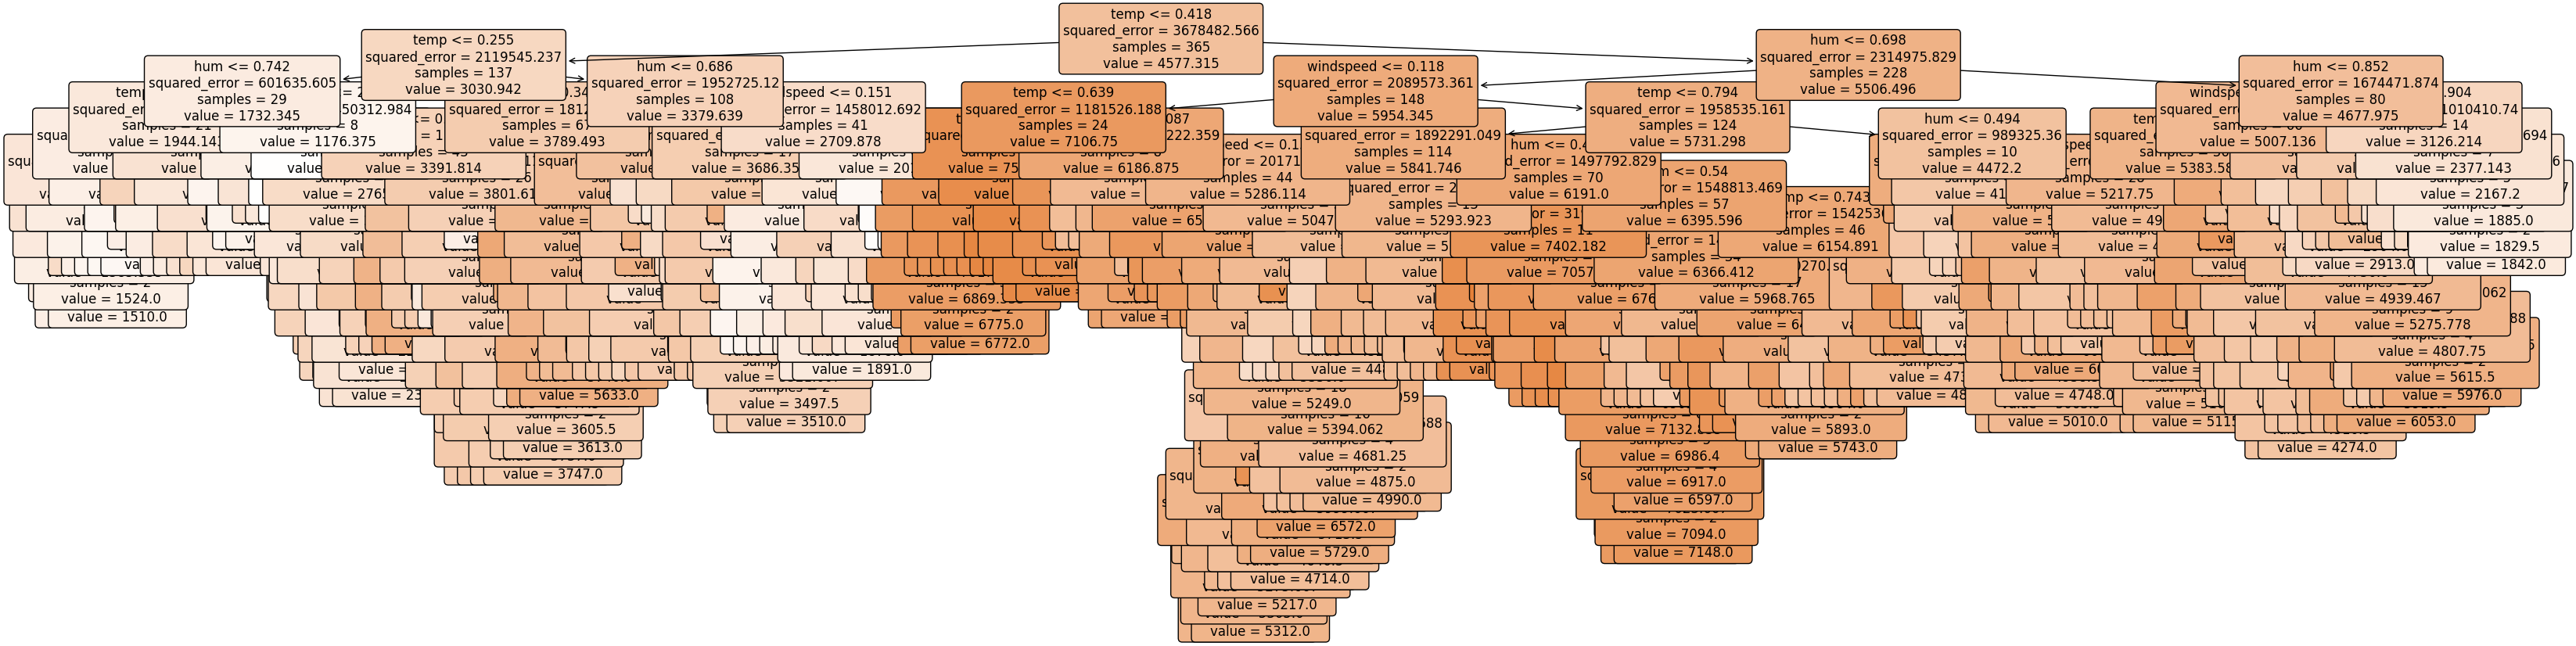

In [7]:
#set the certainty
np.random.seed(42)
test_mses = []
for _ in range(5):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    #naively fit the model
    reg_tree = DecisionTreeRegressor().fit(X_train,y_train)

    # test MSE
    y_pred = reg_tree.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mses.append(test_mse)
    print("The test MSE is: ",test_mse)
    
print("The average MSE of five splists is", np.mean(test_mses))
plt.figure(figsize=(40,10))
plot_tree(reg_tree, filled=True, feature_names=['weathersit', 'temp', 'hum', 'windspeed'], rounded=True, fontsize=12)
plt.show()

# My interpretation for the naively fitted tree
There might be overfitting issues, because:
1. High complexity. The graph of a decision tree that I naively fitted is highly complex, making it difficult for me to generate some useful insights just by viewing it. 
2. High test MSE. Besides its high complexity, the tree's test MSE is also significantly larger than the MSE from Ridge and Lasso used in previous questions. 

# Pruned trees

In [8]:
#set the certainty
np.random.seed(42)
# cost complexity
tree_params = {'ccp_alpha': [0.01,0.1,1,10,100,1000,1e+4,1e+5,1e+6,1e+7]} 
test_mses = []
for _ in range(5):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    
    # fit model
    grid_search = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_tree = grid_search.best_estimator_
    
    # test MSE
    y_pred = best_tree.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mses.append(test_mse)
    print("The test MSE is: ",test_mse)
print("The average MSE of five splists is", np.mean(test_mses))
print("So, yes. Pruning the tree obviously improves the test MSE")

The test MSE is:  2273474.296119452
The test MSE is:  1845985.8919365935
The test MSE is:  1989717.8482909708
The test MSE is:  2511138.0905961455
The test MSE is:  2097702.175356147
The average MSE of five splists is 2143603.660459862
So, yes. Pruning the tree obviously improves the test MSE


# So, yes. Pruning the tree obviously improves the test MSE

# Q1.4 Random Forest

In [9]:
#set the certainty
np.random.seed(42)
forest_params = {'n_estimators':[ i for i in range(10,101,10) ],'ccp_alpha': [100,1000,1e+4,1e+5,1e+6,1e+7]} 
test_mses = []

for i in range(5):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    
    # fit model
    grid_search = GridSearchCV(RandomForestRegressor(), forest_params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_forest = grid_search.best_estimator_
    
    # test MSE
    y_pred = best_forest.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mses.append(test_mse)
    print("Best parameters:", grid_search.best_params_)
    print("The test MSE is: ",test_mse)
print("The average MSE of five splists is", np.mean(test_mses))

Best parameters: {'ccp_alpha': 1000, 'n_estimators': 90}
The test MSE is:  1797385.742694046
Best parameters: {'ccp_alpha': 100000.0, 'n_estimators': 80}
The test MSE is:  1747699.5341469427
Best parameters: {'ccp_alpha': 10000.0, 'n_estimators': 80}
The test MSE is:  1724943.29410783
Best parameters: {'ccp_alpha': 100000.0, 'n_estimators': 80}
The test MSE is:  1736796.5113480461
Best parameters: {'ccp_alpha': 100000.0, 'n_estimators': 50}
The test MSE is:  1866906.0639608349
The average MSE of five splists is 1774746.22925154


# Q1.5

1. Ridge:
    1. Overall Performance: Average MSE of five splits is ranked 2 out of 4
    2. Strengths: It can reduce the model complexity, overfitting, and it easy to interpret. It also remains all features, which is more conscious.
    3. Limitations: It can only capture linear relationship. It can't select features in the way Lasso can. Also, since it doesn't select features, it is more complex than Lasso. It is also very important to fine-tune the lambda for it as the performance heavily relies on the lambda. It also increases bias.
2. Lasso
    1. Overall Performance: Average MSE of five splits is ranked 3 out of 4
    2. Strengths: It can reduce the model complexity and overfitting. Also, it can select relevant features so the result can be easier to interpret than Ridge
    3. Limitations: It can only caputure linear relationship. It performs poorly when there is high multicollinearity among the data, as it can arbitrarily shrink one of two highly correlated features. It is also very important to fine-tune the lambda for it as the performance heavily relies on the lambda. It also increases bias.
3. Regression Tree
    1. Overall Performance: Average MSE of five splits is ranked 4 out of 4. It perform significantly worse than other three models.
    2. Strengths: It can caputure non-linear relationship. The algorithm itself is simple and be easily plotted. So it is easy to understand and interpret.
    3. Limitations: It is too simple that it often has a lower accuracy than other models. Its performance also heavily depends on pruning.
4. Random Forest
    1. Overall Performance: Average MSE of five splits is ranked 1 out of 4. It perform significantly better than other three models.
    2. Strengths: It can caputure non-linear relationship. Use an average result of a number of estimators which makes the accuracy usually good. Randomly select features and use bagging techniques, which makes its performance insensitive to irrelevant features and sampling.
    3. Limitations: It contains a number of estimators, so it can cause a higher computation and time complexity. The complexity of itself also makes the result more difficult to interpret than a decision tree.

# Q2.1

c)steadily increase

The penalty term will reduce the flexibility of the model. The larger the lambda is, the less flexible the model is. The less flexible the model is, the higher the training RSS the model will have.

# Q2.2

b) Decrease initially, and then eventually start increasing in a U shape

When lambda is zero, the model is a normal OLS model. When the lambda becomes larger, it first will make the model less complex and mitigate overfitting problems. In this stage, the test RSS might go down. If we further increase the lambda, the model could become too simple that it would fail to capture features. In the later stage, the test RSS will go up. Thus, the test RSS will decrease initially, and then start increasing in a U shape.


# Q2.3

d)steadily decrease

The penalty term will reduce the model's flexibility. The larger the lambda, the less flexibile the model is. A less flexible model often results in a lower variance.

# Q2.4

c)steadily increase

The penalty term will make the model less complex. The larger the lambda is, the less complex the model will be, leading to a higher bias in the model.

# Q3.1

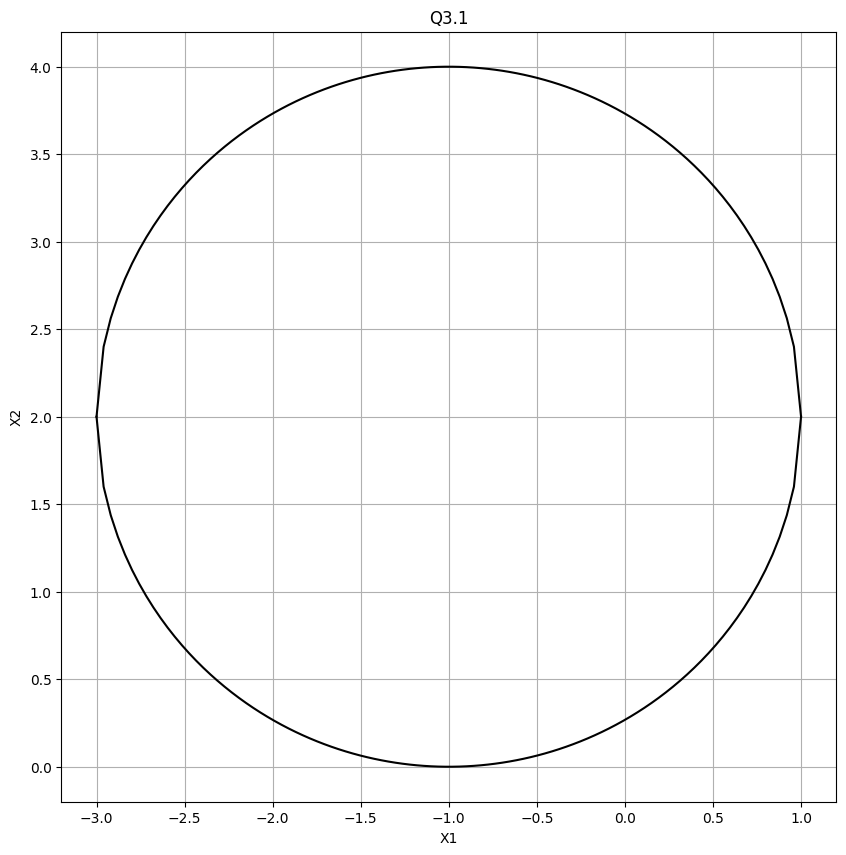

In [10]:
x1 = np.linspace(-3, 1, 100) 
x2_lower = 2 - np.sqrt(4 - (1 + x1)**2)
x2_upper = 2 + np.sqrt(4 - (1 + x1)**2)

plt.figure(figsize=(10, 10))

#plot
plt.plot(x1, x2_upper, color = 'black')
plt.plot(x1, x2_lower, color = 'black')
plt.title("Q3.1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


# Q3.2

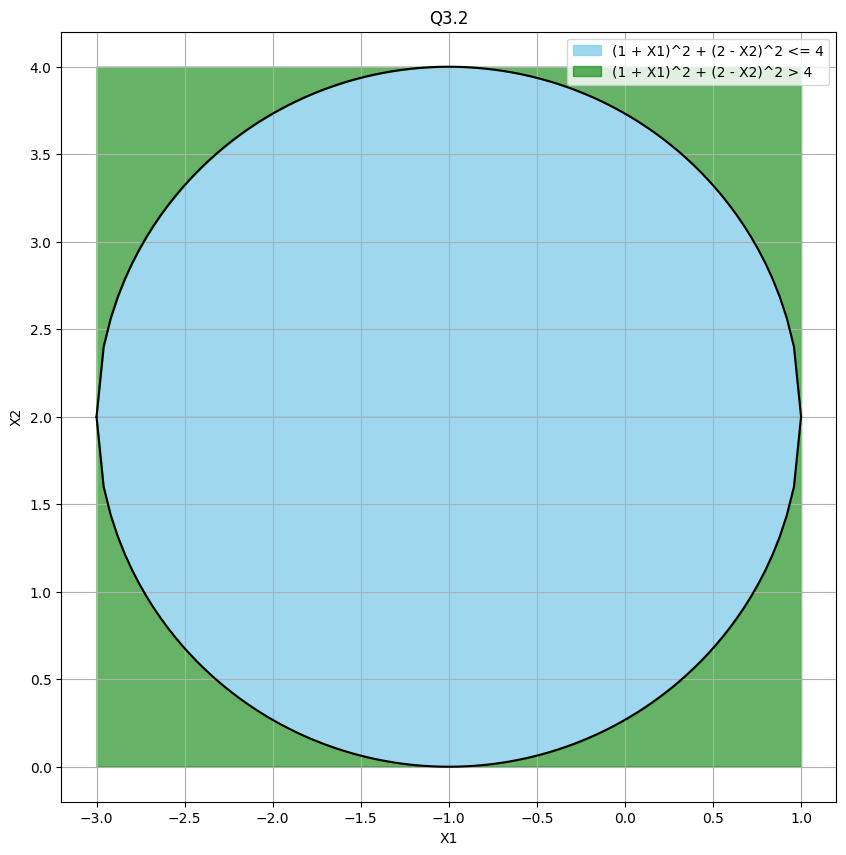

In [11]:
x1 = np.linspace(-3, 1, 100) 
x2_lower = 2 - np.sqrt(4 - (1 + x1)**2)
x2_upper = 2 + np.sqrt(4 - (1 + x1)**2)
top = [4]*100 # upper boundary
bottom = [-4]*100

plt.figure(figsize=(10, 10))
#fill color
plt.fill(x1, x2_upper, color='skyblue', label='(1 + X1)^2 + (2 - X2)^2 <= 4',alpha=0.8)
plt.fill(x1, x2_lower, color='skyblue',alpha=0.8)
plt.fill_between(x1, x2_lower, color='green', label='(1 + X1)^2 + (2 - X2)^2 > 4', alpha=0.6)
plt.fill_between(x1, x2_upper,top, color='green', alpha=0.6)



#plot
plt.plot(x1, x2_upper, color = 'black')
plt.plot(x1, x2_lower, color = 'black')
plt.title("Q3.2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend() 
plt.grid(True)
plt.show()

The left side of the inequality can deemed as the square of the distance to (-1,2). Therefore, if the leftside is larger than 4, it should be outside of the circle. If it is less than 4, it should be inside of the circle.

# Q3.3

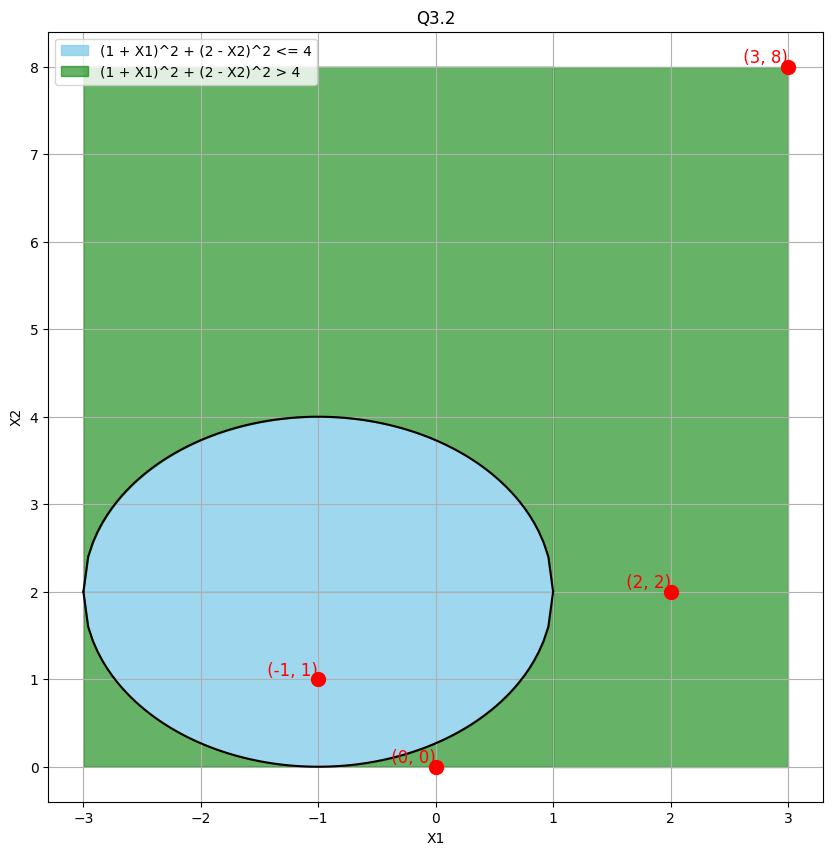

In [12]:
x1 = np.linspace(-3, 1, 100) 
x2_lower = 2 - np.sqrt(4 - (1 + x1)**2)
x2_upper = 2 + np.sqrt(4 - (1 + x1)**2)
top = [8]*100 # upper boundary
bottom = np.linspace(-3, 3, 100)

def plot_dot(x,y):
    plt.plot(x, y, marker='o', markersize=10, color='red')
    plt.text(x, y, ' ({}, {})'.format(x,y), verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='red')
    


plt.figure(figsize=(10, 10))
#fill color
plt.fill(x1, x2_upper, color='skyblue', label='(1 + X1)^2 + (2 - X2)^2 <= 4',alpha=0.8)
plt.fill(x1, x2_lower, color='skyblue',alpha=0.8)
plt.fill_between(x1, x2_lower, color='green', label='(1 + X1)^2 + (2 - X2)^2 > 4', alpha=0.6)
plt.fill_between(x1, x2_upper,top, color='green', alpha=0.6)
plt.fill_betweenx(np.arange(0, 9),1, 3, color='green', alpha=0.6)

#plot dots
plot_dot(0,0)
plot_dot(-1,1)
plot_dot(2,2)
plot_dot(3,8)

#plot
plt.plot(x1, x2_upper, color = 'black')
plt.plot(x1, x2_lower, color = 'black')
plt.title("Q3.2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend() 
plt.grid(True)
plt.show()

From the figure. One can easily tell that (0,0),(2,2),(3,8) belong to positive class and (-1,1) belong to negative class.

# Q3.4

The equation of the decision boundary can be rearranged to:
$$ X_1^2 + 2X_1 + 1 + X_2^2 - 4X_2 + 4 = 4 $$
Further rearranged it to:
$$ X_1^2 + 2X_1 + X_2^2 - 4X_2 + 1 = 0 $$

Thus, it is not linear interms of $X_1$ and $X_2$. It is linear in terms of $X_1$, $X_2^2$,$𝑋_2$and$𝑋_2^2$.
